In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Example: adjust source path to your real path
!cp -r "/content/drive/MyDrive/Otoscopic_Data/" "/content/ear"


In [3]:
DATA_ROOT = '/content/ear'

In [4]:
# 2. Create train/val/test splits (70/20/10 default) and copy files
import os, shutil, random
from pathlib import Path

def create_splits(src_root, out_root, train_pct=0.7, val_pct=0.2, test_pct=0.1, seed=42):
    random.seed(seed)
    src_root = Path(src_root)
    out_root = Path(out_root)
    if out_root.exists():
        print("Warning: output folder exists. Files may be overwritten.")
    for split in ['train','val','test']:
        (out_root/split).mkdir(parents=True, exist_ok=True)
    classes = [d for d in src_root.iterdir() if d.is_dir()]
    for cls in classes:
        files = [p for p in cls.iterdir() if p.is_file()]
        random.shuffle(files)
        n = len(files)
        n_train = int(n * train_pct)
        n_val = int(n * val_pct)
        train_files = files[:n_train]
        val_files = files[n_train:n_train+n_val]
        test_files = files[n_train+n_val:]
        for split, split_files in [('train',train_files), ('val',val_files), ('test',test_files)]:
            dest = out_root/split/cls.name
            dest.mkdir(parents=True, exist_ok=True)
            for f in split_files:
                shutil.copy(f, dest/f.name)

OUT_ROOT = '/content/otitis_dataset'  # working dataset with splits
create_splits(DATA_ROOT, OUT_ROOT, train_pct=0.7, val_pct=0.2, test_pct=0.1)
print("Done splitting. Check:", OUT_ROOT)


Done splitting. Check: /content/otitis_dataset


In [18]:
from pathlib import Path
import os

# Update these paths as needed
RAW_ROOT = Path('/content/drive/MyDrive/Otoscopic_Data')   # your original raw dataset (class folders here)
SPLIT_ROOT = Path('/content/otitis_dataset')                  # your split dataset used for preprocessing (train/val/test)
PREP_ROOT = Path('/content/otitis_dataset_preprocessed_fixed')# your preprocessed output

missing_classes = ['Myringosclerosis', 'Normal']

def list_folder(path, max_show=50):
    p = Path(path)
    if not p.exists():
        print("MISSING PATH:", p)
        return
    files = sorted([f.name for f in p.iterdir() if f.is_file()])
    print(f"\n{p}  (total files: {len(files)})")
    for fname in files[:max_show]:
        print(" -", fname)
    if len(files) > max_show:
        print(" ...", len(files)-max_show, "more")

# Check raw root
print("=== Raw dataset (per-class) ===")
for cls in missing_classes:
    list_folder(RAW_ROOT/cls)

# Check split root (train only) — to ensure split contains files for these classes
print("\n=== Split dataset (train) ===")
for cls in missing_classes:
    list_folder(SPLIT_ROOT/'train'/cls)

# Check preprocessed output (train) — confirm empty
print("\n=== Preprocessed output (train) ===")
for cls in missing_classes:
    list_folder(PREP_ROOT/'train'/cls)


=== Raw dataset (per-class) ===

/content/drive/MyDrive/Otoscopic_Data/Myringosclerosis  (total files: 600)
 - mys (1).jpg
 - mys (10).jpg
 - mys (100).jpg
 - mys (101).jpg
 - mys (102).jpg
 - mys (103).jpg
 - mys (104).jpg
 - mys (105).jpg
 - mys (106).jpg
 - mys (107).jpg
 - mys (108).jpg
 - mys (109).jpg
 - mys (11).jpg
 - mys (110).jpg
 - mys (111).jpg
 - mys (112).jpg
 - mys (113).jpg
 - mys (114).jpg
 - mys (115).jpg
 - mys (116).jpg
 - mys (117).jpg
 - mys (118).jpg
 - mys (119).jpg
 - mys (12).jpg
 - mys (120).jpg
 - mys (121).jpg
 - mys (122).jpg
 - mys (123).jpg
 - mys (124).jpg
 - mys (125).jpg
 - mys (126).jpg
 - mys (127).jpg
 - mys (128).jpg
 - mys (129).jpg
 - mys (13).jpg
 - mys (130).jpg
 - mys (131).jpg
 - mys (132).jpg
 - mys (133).jpg
 - mys (134).jpg
 - mys (135).jpg
 - mys (136).jpg
 - mys (137).jpg
 - mys (138).jpg
 - mys (139).jpg
 - mys (14).jpg
 - mys (140).jpg
 - mys (141).jpg
 - mys (142).jpg
 - mys (143).jpg
 ... 550 more

/content/drive/MyDrive/Otoscopic_D

In [19]:
from pathlib import Path
RAW_ROOT = Path('/content/drive/MyDrive/Otoscopic_Data')   # <- your raw data root shown earlier
print("RAW ROOT exists?:", RAW_ROOT.exists())
print("Classes found in RAW ROOT:")
for d in sorted([p for p in RAW_ROOT.iterdir() if p.is_dir()]):
    files = list(d.glob('*'))
    print(f"- {d.name}: {len(files)} files (example names: {files[:5]})")


RAW ROOT exists?: True
Classes found in RAW ROOT:
- Acute Otitis Media: 600 files (example names: [PosixPath('/content/drive/MyDrive/Otoscopic_Data/Acute Otitis Media/aom (214).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Acute Otitis Media/aom (217).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Acute Otitis Media/aom (239).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Acute Otitis Media/aom (235).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Acute Otitis Media/aom (212).jpg')])
- Cerumen Impaction: 600 files (example names: [PosixPath('/content/drive/MyDrive/Otoscopic_Data/Cerumen Impaction/ci (179).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Cerumen Impaction/ci (168).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Cerumen Impaction/ci (138).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Cerumen Impaction/ci (12).jpg'), PosixPath('/content/drive/MyDrive/Otoscopic_Data/Cerumen Impaction/ci (178).jpg')])
- Chronic Ot

In [20]:
import random, shutil
from pathlib import Path

SRC_ROOT = Path('/content/drive/MyDrive/Otoscopic_Data')  # correct raw source
OUT_ROOT = Path('/content/otitis_dataset')                # where train/val/test will be created
TRAIN_PCT, VAL_PCT, TEST_PCT = 0.7, 0.2, 0.1
SEED = 42

# remove old OUT_ROOT if it exists (optional) — uncomment to reset
# if OUT_ROOT.exists():
#     shutil.rmtree(OUT_ROOT)

OUT_ROOT.mkdir(parents=True, exist_ok=True)
for split in ['train','val','test']:
    (OUT_ROOT/split).mkdir(parents=True, exist_ok=True)

random.seed(SEED)

classes = [d for d in SRC_ROOT.iterdir() if d.is_dir()]
print("Classes to split:", [c.name for c in classes])

for cls in classes:
    files = [p for p in cls.iterdir() if p.is_file()]
    if len(files) == 0:
        print(f"Skipping empty class folder (no files): {cls.name}")
        continue
    random.shuffle(files)
    n = len(files)
    n_train = int(n * TRAIN_PCT)
    n_val = int(n * VAL_PCT)
    train_files = files[:n_train]
    val_files = files[n_train:n_train+n_val]
    test_files = files[n_train+n_val:]
    for split, split_files in [('train',train_files), ('val',val_files), ('test',test_files)]:
        dest = OUT_ROOT / split / cls.name
        dest.mkdir(parents=True, exist_ok=True)
        for f in split_files:
            shutil.copy(f, dest / f.name)

print("Splitting complete. Check:", OUT_ROOT)
# quick counts
for split in ['train','val','test']:
    print(split, {d.name: len(list(d.glob('*'))) for d in (OUT_ROOT/split).iterdir() if d.is_dir()})


Classes to split: ['Chronic Otitis Media', 'Acute Otitis Media', 'Normal', 'Cerumen Impaction', 'Myringosclerosis']
Splitting complete. Check: /content/otitis_dataset
train {'Cerumen Impaction': 553, 'Myringosclerosis': 420, 'Acute Otitis Media': 518, 'Normal': 420, 'Chronic Otitis Media': 550}
val {'Cerumen Impaction': 219, 'Myringosclerosis': 120, 'Acute Otitis Media': 194, 'Normal': 120, 'Chronic Otitis Media': 216}
test {'Cerumen Impaction': 116, 'Myringosclerosis': 60, 'Acute Otitis Media': 101, 'Normal': 60, 'Chronic Otitis Media': 114}


In [21]:
# Robust preprocessing: PIL-first, CLAHE, denoise, resize, save JPEG
from PIL import Image, ImageOps, UnidentifiedImageError
import numpy as np, cv2, traceback
from pathlib import Path
from tqdm import tqdm

IN_SPLIT_ROOT = Path('/content/otitis_dataset')                    # input splits created above
OUT_PREP_ROOT = Path('/content/otitis_dataset_preprocessed_retry') # output preprocessed
OUT_PREP_ROOT.mkdir(parents=True, exist_ok=True)
IMG_SIZE = (224,224)

success_log = OUT_PREP_ROOT/'success_log.txt'
fail_log = OUT_PREP_ROOT/'fail_log.txt'
success_log.write_text('')
fail_log.write_text('')

def load_pil_then_cv(path):
    try:
        with Image.open(path) as im:
            im = ImageOps.exif_transpose(im)
            im = im.convert('RGB')
            return np.array(im)
    except Exception as e:
        img = cv2.imread(str(path))
        if img is None:
            raise RuntimeError(f"PIL failed ({repr(e)}), cv2 returned None")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img

for split in ['train','val','test']:
    for clsdir in sorted((IN_SPLIT_ROOT/split).glob('*')):
        if not clsdir.is_dir(): continue
        out_cls = OUT_PREP_ROOT/split/clsdir.name
        out_cls.mkdir(parents=True, exist_ok=True)
        print(f"\nProcessing {split}/{clsdir.name}  (files: {len(list(clsdir.glob('*')))})")
        for p in tqdm(sorted(clsdir.glob('*')), leave=False):
            try:
                arr = load_pil_then_cv(p)
                # convert RGB->BGR for cv2 processing
                bgr = cv2.cvtColor(arr, cv2.COLOR_RGB2BGR)
                lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
                l,a,b = cv2.split(lab)
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                cl = clahe.apply(l)
                lab = cv2.merge((cl,a,b))
                img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
                den = cv2.fastNlMeansDenoisingColored(img_clahe, None, 10,10,7,21)
                resized = cv2.resize(den, IMG_SIZE, interpolation=cv2.INTER_AREA)
                outname = p.stem + "_" + str(abs(hash(str(p))))[:8] + ".jpg"
                cv2.imwrite(str(out_cls/outname), resized, [int(cv2.IMWRITE_JPEG_QUALITY), 92])
                success_log.open('a').write(f"{split}/{clsdir.name}/{p.name}\n")
            except Exception as e:
                fail_log.open('a').write(f"{split}/{clsdir.name}/{p.name}  => {repr(e)}\n")

print("\nRobust reprocessing finished.")
print("Success log:", success_log)
print("Fail log:", fail_log)

# Print final counts
for split in ['train','val','test']:
    counts = {d.name: len(list(d.glob('*'))) for d in (OUT_PREP_ROOT/split).iterdir() if d.is_dir()}
    print(split, counts)



Processing train/Acute Otitis Media  (files: 518)



Processing train/Cerumen Impaction  (files: 553)



Processing train/Chronic Otitis Media  (files: 550)



Processing train/Myringosclerosis  (files: 420)



Processing train/Normal  (files: 420)



Processing val/Acute Otitis Media  (files: 194)



Processing val/Cerumen Impaction  (files: 219)



Processing val/Chronic Otitis Media  (files: 216)



Processing val/Myringosclerosis  (files: 120)



Processing val/Normal  (files: 120)



Processing test/Acute Otitis Media  (files: 101)



Processing test/Cerumen Impaction  (files: 116)



Processing test/Chronic Otitis Media  (files: 114)



Processing test/Myringosclerosis  (files: 60)



Processing test/Normal  (files: 60)



Robust reprocessing finished.
Success log: /content/otitis_dataset_preprocessed_retry/success_log.txt
Fail log: /content/otitis_dataset_preprocessed_retry/fail_log.txt
train {'Cerumen Impaction': 553, 'Myringosclerosis': 420, 'Acute Otitis Media': 518, 'Normal': 420, 'Chronic Otitis Media': 550}
val {'Cerumen Impaction': 219, 'Myringosclerosis': 120, 'Acute Otitis Media': 194, 'Normal': 120, 'Chronic Otitis Media': 216}
test {'Cerumen Impaction': 116, 'Myringosclerosis': 60, 'Acute Otitis Media': 101, 'Normal': 60, 'Chronic Otitis Media': 114}


In [22]:
from pathlib import Path
prepped = Path('/content/otitis_dataset_preprocessed_retry')
for split in ['train','val','test']:
    print(split, {d.name: len(list(d.glob('*'))) for d in (prepped/split).iterdir() if d.is_dir()})

train {'Cerumen Impaction': 553, 'Myringosclerosis': 420, 'Acute Otitis Media': 518, 'Normal': 420, 'Chronic Otitis Media': 550}
val {'Cerumen Impaction': 219, 'Myringosclerosis': 120, 'Acute Otitis Media': 194, 'Normal': 120, 'Chronic Otitis Media': 216}
test {'Cerumen Impaction': 116, 'Myringosclerosis': 60, 'Acute Otitis Media': 101, 'Normal': 60, 'Chronic Otitis Media': 114}


In [23]:
from collections import Counter
import os

def class_counts(directory):
    counts = {}
    for cls in sorted(os.listdir(directory)):
        p = os.path.join(directory, cls)
        if os.path.isdir(p):
            counts[cls] = len([f for f in os.listdir(p) if os.path.isfile(os.path.join(p,f))])
    return counts

print("Train counts:", class_counts(f'{prepped}/train'))
print("Val counts:  ", class_counts(f'{prepped}/val'))
print("Test counts: ", class_counts(f'{prepped}/test'))


Train counts: {'Acute Otitis Media': 518, 'Cerumen Impaction': 553, 'Chronic Otitis Media': 550, 'Myringosclerosis': 420, 'Normal': 420}
Val counts:   {'Acute Otitis Media': 194, 'Cerumen Impaction': 219, 'Chronic Otitis Media': 216, 'Myringosclerosis': 120, 'Normal': 120}
Test counts:  {'Acute Otitis Media': 101, 'Cerumen Impaction': 116, 'Chronic Otitis Media': 114, 'Myringosclerosis': 60, 'Normal': 60}


In [24]:
# 4. Keras data generators (or tf.data). Using ImageDataGenerator for simplicity.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 16
IMG_SIZE = (224,224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    brightness_range=(0.8,1.2),
    horizontal_flip=False  # do NOT flip if ear laterality matters
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    f'{prepped}/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    f'{prepped}/val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_datagen.flow_from_directory(
    f'{prepped}/test',
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 2461 images belonging to 5 classes.
Found 869 images belonging to 5 classes.
Found 451 images belonging to 5 classes.


In [25]:
# 5. Build MobileNetV2 base + MLP head
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2

NUM_CLASSES = len(train_gen.class_indices)
base = MobileNetV2(input_shape=(IMG_SIZE[0],IMG_SIZE[1],3), include_top=False, pooling='avg', weights='imagenet')
base.trainable = False

inputs = layers.Input(shape=(IMG_SIZE[0],IMG_SIZE[1],3))
x = base(inputs, training=False)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [26]:
# 6. Train head-only
EPOCHS_HEAD = 10
history_head = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS_HEAD)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 62s 343ms/step - accuracy: 0.5614 - loss: 1.1525 - val_accuracy: 0.9356 - val_loss: 0.2532
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 34s 220ms/step - accuracy: 0.8857 - loss: 0.3222 - val_accuracy: 0.9551 - val_loss: 0.1632
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.9075 - loss: 0.2490 - val_accuracy: 0.9712 - val_loss: 0.1175
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 35s 227ms/step - accuracy: 0.9362 - loss: 0.1915 - val_accuracy: 0.9724 - val_loss: 0.1024
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 43s 239ms/step - accuracy: 0.9416 - loss: 0.1689 - val_accuracy: 0.9701 - val_loss: 0.0929
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 34s 223ms/step - accuracy: 0.9623 - loss: 0.1292 - val_accuracy: 0.9712 - val_loss: 0.0838
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 37s 242ms/step - accuracy: 0.9543 - loss: 0.1193 - val_accuracy: 0.9770 - val_loss: 0.0703
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.9692 - loss: 0

In [27]:
# 7. Fine-tune: unfreeze top layers of base and continue training
# Unfreeze from a certain layer onwards
fine_tune_at = 100  # tweak based on model depth and dataset size
for layer in base.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base.layers[fine_tune_at:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS_FINE = 10
history_ft = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS_FINE)


Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 73s 341ms/step - accuracy: 0.6286 - loss: 1.5825 - val_accuracy: 0.8815 - val_loss: 0.3348
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 36s 233ms/step - accuracy: 0.8600 - loss: 0.3855 - val_accuracy: 0.9056 - val_loss: 0.2549
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 36s 233ms/step - accuracy: 0.9208 - loss: 0.2387 - val_accuracy: 0.9287 - val_loss: 0.1816
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 35s 224ms/step - accuracy: 0.9436 - loss: 0.1939 - val_accuracy: 0.9356 - val_loss: 0.1521
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 36s 235ms/step - accuracy: 0.9411 - loss: 0.1798 - val_accuracy: 0.9505 - val_loss: 0.1178
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 35s 225ms/step - accuracy: 0.9578 - loss: 0.1240 - val_accuracy: 0.9793 - val_loss: 0.0676
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 36s 234ms/step - accuracy: 0.9743 - loss: 0.0924 - val_accuracy: 0.9862 - val_loss: 0.0420
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 36s 233ms/step - accuracy: 0.9642 - loss: 0

In [28]:
# 8. Evaluate on test set (confusion matrix & classification report)
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

test_steps = len(test_gen)
y_true = test_gen.classes
test_gen.reset()
y_pred_proba = model.predict(test_gen, steps=test_steps, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)

labels = list(train_gen.class_indices.keys())
print("Classification report:")
print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion matrix:")
print(cm_df)


451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
Classification report:
                      precision    recall  f1-score   support

  Acute Otitis Media       1.00      1.00      1.00       101
   Cerumen Impaction       1.00      1.00      1.00       116
Chronic Otitis Media       1.00      1.00      1.00       114
    Myringosclerosis       0.98      0.92      0.95        60
              Normal       0.92      0.98      0.95        60

            accuracy                           0.99       451
           macro avg       0.98      0.98      0.98       451
        weighted avg       0.99      0.99      0.99       451

Confusion matrix:
                      Acute Otitis Media  Cerumen Impaction  \
Acute Otitis Media                   101                  0   
Cerumen Impaction                      0                116   
Chronic Otitis Media                   0                  0   
Myringosclerosis                       0                  0   
Normal                                 0  

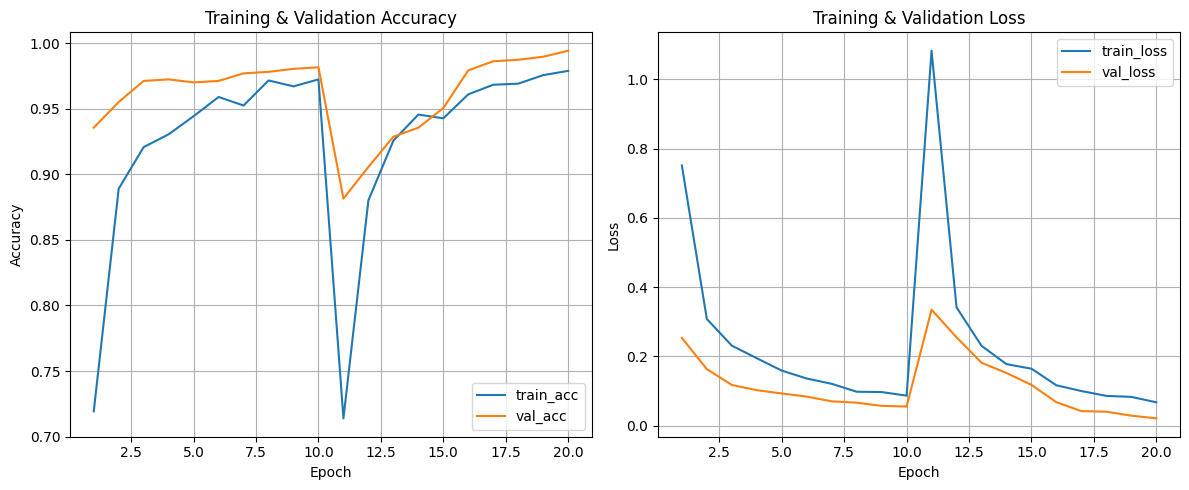

Saved training_acc_loss.png


In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Provide the history objects you used. If you only used one, set the other to None.
# e.g.
# history_head = history  # result from model.fit(...) for head phase
# history_ft = history2   # result from model.fit(...) for fine tune phase
h_head = globals().get('history_head', None)
h_ft   = globals().get('history_ft', None)

def get_history_dict(h):
    if h is None:
        return None
    # some Keras returns History object, some return a dict
    hist = h.history if hasattr(h, 'history') else h
    return hist

hh = get_history_dict(h_head)
hf = get_history_dict(h_ft)

# Build combined series
def combine_series(h1, h2, key):
    series = []
    if h1 is not None and key in h1:
        series += list(h1[key])
    if h2 is not None and key in h2:
        series += list(h2[key])
    return np.array(series)

acc = combine_series(hh, hf, 'accuracy')          # training accuracy
val_acc = combine_series(hh, hf, 'val_accuracy')  # validation accuracy
loss = combine_series(hh, hf, 'loss')
val_loss = combine_series(hh, hf, 'val_loss')

# X axis: epoch numbers starting from 1
epochs = np.arange(1, 1 + max(len(acc), len(loss)))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
if len(acc)>0:
    plt.plot(epochs[:len(acc)], acc, label='train_acc')
if len(val_acc)>0:
    plt.plot(epochs[:len(val_acc)], val_acc, label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Training & Validation Accuracy')
plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
if len(loss)>0:
    plt.plot(epochs[:len(loss)], loss, label='train_loss')
if len(val_loss)>0:
    plt.plot(epochs[:len(val_loss)], val_loss, label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Training & Validation Loss')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.savefig('training_acc_loss.png', dpi=150)
plt.show()

print("Saved training_acc_loss.png")


Model: "inspect_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gradcam_input (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_intermediate (Functional)  │ [(None, 7, 7, 1280),   │     2,257,984 │
│                                 │ (None, 7, 7, 1280)]    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_gap                        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ head_dense1 (Dense)             │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ head_dropout (Dropout)          │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ head_preds (Dense)              │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 2,553,093 (9.74 MB)

 Non-trainable params: 34,112 (133.25 KB)

Trained model layers (sample):
input_layer_3 <class 'keras.src.layers.core.input_layer.InputLayer'>
mobilenetv2_1.00_224 <class 'keras.src.models.functional.Functional'>
dense_2 <class 'keras.src.layers.core.dense.Dense'>
dropout_1 <class 'keras.src.layers.regularization.dropout.Dropout'>
dense_3 <class 'keras.src.layers.core.dense.Dense'>

Inspect model layers:
gradcam_input <class 'keras.src.layers.core.input_layer.InputLayer'>
base_intermediate <class 'keras.src.models.functional.Functional'>
base_gap <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
head_dense1 <class 'keras.src.layers.core.dense.Dense'>
head_dropout <class 'keras.src.layers.regularization.dropout.Dropout'>
head_preds <class 'keras.src.layers.core.dense.Dense'>
Found trained nested base: mobilenetv2_1.00_224
Attempted to copy base weights (best-effort).
Predicted (inspect_model, preliminary): 4 0.5461272597312927
Heatmap shape: (7, 7)


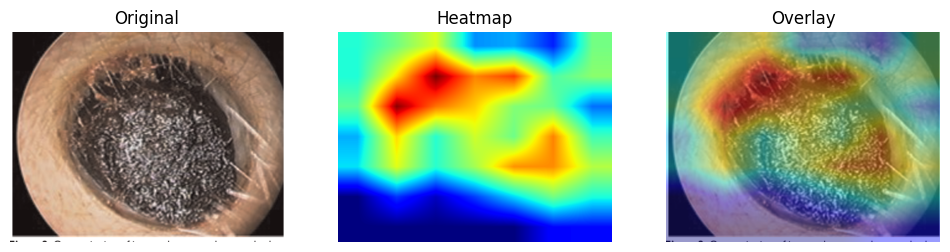

In [65]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.preprocessing import image as kimage

# ---------- Config: adapt if different ----------
IMG_SIZE = (224, 224)
NUM_CLASSES = len(train_gen.class_indices)  # use your variable
IMG_PATH = '/content/2-Figure2-1.png'

# ---------- 1) Build a fresh model that exposes Conv_1 output and final preds ----------
def build_inspect_model(num_classes, img_size=(224,224), conv_layer_name='Conv_1'):
    # canonical input for grad computations
    new_input = Input(shape=(img_size[0], img_size[1], 3), name='gradcam_input')

    # fresh MobileNetV2 base (no weights here; you'll copy them later)
    base = MobileNetV2(input_shape=(img_size[0], img_size[1], 3),
                       include_top=False,
                       pooling=None,
                       weights=None)

    # IMPORTANT: build an intermediate model that returns BOTH the conv-layer output AND the full base output
    try:
        conv_layer_in_base = base.get_layer(conv_layer_name)
    except Exception as e:
        raise RuntimeError(f"Could not find layer {conv_layer_name} in the fresh base: {e}")

    # Model mapping base.input -> [conv_layer.output, base.output]
    base_intermediate = Model(inputs=base.input, outputs=[conv_layer_in_base.output, base.output], name='base_intermediate')

    # Now call base_intermediate on the new_input once — this returns tensors tied to the SAME graph
    conv_output, base_out = base_intermediate(new_input, training=False)  # conv_output and base_out are connected to new_input

    # pooling and head (same structure you trained)
    pooled = layers.GlobalAveragePooling2D(name='base_gap')(base_out)
    x = layers.Dense(256, activation='relu', name='head_dense1')(pooled)
    x = layers.Dropout(0.4, name='head_dropout')(x)
    preds = layers.Dense(num_classes, activation='softmax', name='head_preds')(x)

    # full inspect model: input -> [conv_output, preds]
    inspect_model = Model(inputs=new_input, outputs=[conv_output, preds], name='inspect_model')
    return inspect_model, base, base_intermediate


inspect_model, fresh_base, intermediate_model = build_inspect_model(NUM_CLASSES, IMG_SIZE, conv_layer_name='Conv_1')
inspect_model.summary()   # optional: inspect architecture

# ---------- 2) Copy weights from your trained 'model' into this new inspect_model ----------
# We'll map layers by name. This assumes your trained model's head layer names match: dense_2/dense_3/dropout_1 etc.
# Print names from both models first to verify mapping:
print("Trained model layers (sample):")
for l in model.layers[-10:]:
    print(l.name, type(l))

print("\nInspect model layers:")
for l in inspect_model.layers[-20:]:
    print(l.name, type(l))

# Strategy: for each layer in inspect_model, if a layer with same name exists in trained model,
# copy weights. For base (MobileNetV2) layers, copy by matching layer names inside the nested base.
# trained model contains nested layer 'mobilenetv2_1.00_224' — we'll copy its inner layers to fresh_base
trained_layers_by_name = {layer.name: layer for layer in model.layers}

# Copy head weights (top-level layers of inspect_model)
for layer in inspect_model.layers:
    name = layer.name
    if name in trained_layers_by_name:
        try:
            layer.set_weights(trained_layers_by_name[name].get_weights())
            print("Copied weights for layer:", name)
        except Exception as e:
            print("Skipping copy for layer", name, "->", e)

# Now copy weights for the MobileNetV2 base inner layers:
# trained nested base:
try:
    trained_nested_base = model.get_layer('mobilenetv2_1.00_224')
    print("Found trained nested base:", trained_nested_base.name)
    # map trained nested base's layers by name
    trained_nested_by_name = {l.name: l for l in trained_nested_base.layers}
    # copy into fresh_base
    for l in fresh_base.layers:
        if l.name in trained_nested_by_name:
            try:
                l.set_weights(trained_nested_by_name[l.name].get_weights())
            except Exception:
                # many layers (BatchNorm) have different trackable weights shapes if training flags differ;
                # still, we attempt best-effort copying.
                pass
    print("Attempted to copy base weights (best-effort).")
except Exception as e:
    print("Could not find trained nested base to copy from:", e)

# ---------- 3) Use the inspect_model to compute conv_output and predictions, then Grad-CAM ----------
def preprocess_for_model(img_path, target_size=(224,224)):
    img = kimage.load_img(img_path, target_size=target_size)
    arr = kimage.img_to_array(img).astype('float32')
    # If you used mobilenet_v2.preprocess_input during training, use it here:
    # from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
    # arr = preprocess_input(arr)
    arr /= 255.0
    arr = np.expand_dims(arr, 0)
    return arr

img_np = preprocess_for_model(IMG_PATH, IMG_SIZE)
img_tf = tf.convert_to_tensor(img_np, dtype=tf.float32)

# 3A) Optional: run one forward pass to get a stable prediction index
# (useful for checking that inspect_model's preds match your trained model)
conv_out_tmp, preds_tmp = inspect_model(img_tf, training=False)
pred_idx = int(tf.argmax(preds_tmp[0]).numpy())
print("Predicted (inspect_model, preliminary):", pred_idx, float(preds_tmp[0][pred_idx]))

# 3B) Now compute gradients with the conv tensor produced inside the tape
with tf.GradientTape() as tape:
    # IMPORTANT: call the model inside the tape so produced tensors are tracked
    conv_out, preds = inspect_model(img_tf, training=False)   # conv_out is created here
    # watch the conv activations we just obtained
    tape.watch(conv_out)
    class_channel = preds[:, pred_idx]

# grads of the target class w.r.t the conv feature maps
grads = tape.gradient(class_channel, conv_out)
if grads is None:
    raise RuntimeError("grads is None — check that conv_output is connected to predictions and pred_idx is valid.")

# pooled gradients & weighted combination to form heatmap
pooled_grads = tf.reduce_mean(grads, axis=(0,1,2)).numpy()
conv_out_np = conv_out[0].numpy()   # (h,w,channels)
for i in range(pooled_grads.shape[-1]):
    conv_out_np[:,:,i] *= pooled_grads[i]

heatmap = np.mean(conv_out_np, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= (np.max(heatmap) + 1e-8)
print("Heatmap shape:", heatmap.shape)

# ---------- 4) Overlay heatmap on original image ----------
orig_bgr = cv2.imread(IMG_PATH)
if orig_bgr is None:
    from PIL import Image
    pil = Image.open(IMG_PATH).convert('RGB')
    orig_bgr = cv2.cvtColor(np.array(pil), cv2.COLOR_RGB2BGR)

heatmap_resized = cv2.resize(heatmap, (orig_bgr.shape[1], orig_bgr.shape[0]))
heatmap_uint8 = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
overlay = cv2.addWeighted(orig_bgr, 0.6, heatmap_color, 0.4, 0)

# show
orig_rgb = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)
overlay_rgb = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(orig_rgb); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(heatmap_resized, cmap='jet'); plt.title('Heatmap'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(overlay_rgb); plt.title('Overlay'); plt.axis('off')
plt.show()



In [52]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as kimage
from pathlib import Path

def find_last_conv_layer_name(model):
    """Search recursively for last convolutional layer name & the submodel that contains it.

    Returns (submodel_layer_name, conv_layer_name) where:
      - submodel_layer_name: name of the nested submodel layer inside `model` (or None if conv found at top-level)
      - conv_layer_name: name of the conv layer (as used in the submodel)
    """
    # First try top-level layers
    for layer in reversed(model.layers):
        lname = layer.name.lower()
        if 'conv' in lname and hasattr(layer, 'output'):
            return (None, layer.name)

    # If not found, search submodels
    for layer in reversed(model.layers):
        # A nested functional model will have .layers attribute
        if hasattr(layer, 'layers'):
            # search its layers
            for sub in reversed(layer.layers):
                if 'conv' in sub.name.lower():
                    return (layer.name, sub.name)
    return (None, None)

def make_gradcam_heatmap(img_array, model, submodel_name, conv_layer_name, pred_index=None):
    """
    img_array: preprocessed input (1,H,W,3)
    model: your full model
    submodel_name: name of nested submodel layer (or None if conv_layer_name is top-level)
    conv_layer_name: name of convolutional layer (string)
    """
    if conv_layer_name is None:
        raise RuntimeError("Could not detect a convolutional layer in model.")
    # Get the conv layer tensor in the computation graph
    if submodel_name is None:
        conv_layer = model.get_layer(conv_layer_name)
        conv_output = conv_layer.output
    else:
        # get nested submodel object
        nested = model.get_layer(submodel_name)
        # nested is a Model-like layer, we can fetch its internal layer
        conv_layer = nested.get_layer(conv_layer_name)
        conv_output = conv_layer.output

    # build grad model mapping model.input -> [conv_output, model.output]
    grad_model = tf.keras.models.Model([model.input], [conv_output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    # weighted sum of channels
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-8)
    return heatmap.numpy()

def preprocess_for_model(img_path, target_size=(224,224)):
    img = kimage.load_img(img_path, target_size=target_size)
    arr = kimage.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, 0).astype('float32')
    return arr

def show_gradcam(img_path, model, figsize=(12,4)):
    # 1) find conv layer
    submodel_name, conv_name = find_last_conv_layer_name(model)
    print("Detected last conv info:", submodel_name, conv_name)

    # 2) preprocess
    img_tensor = preprocess_for_model(img_path, target_size=(224,224))

    # 3) predict
    preds = model.predict(img_tensor)
    pred_idx = int(np.argmax(preds[0]))
    print("Predicted:", pred_idx, "prob:", float(preds[0][pred_idx]))

    # 4) compute heatmap
    heatmap = make_gradcam_heatmap(img_tensor, model, submodel_name, conv_name, pred_index=pred_idx)

    # 5) overlay on original (load original with cv2 to preserve size)
    orig = cv2.imread(img_path)
    if orig is None:
        raise RuntimeError("Could not read original image with cv2:", img_path)
    orig_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    heatmap_resized = cv2.resize(heatmap, (orig_rgb.shape[1], orig_rgb.shape[0]))
    heatmap_col = plt.cm.jet(heatmap_resized)[:, :, :3]
    overlay = heatmap_col * 0.4 + (orig_rgb.astype('float32') / 255.0) * 0.6

    plt.figure(figsize=figsize)
    plt.subplot(1,3,1); plt.title('Original'); plt.axis('off'); plt.imshow(orig_rgb)
    plt.subplot(1,3,2); plt.title('Heatmap'); plt.axis('off'); plt.imshow(heatmap_resized, cmap='jet')
    plt.subplot(1,3,3); plt.title('Overlay'); plt.axis('off'); plt.imshow(overlay)
    plt.show()

# Example: change IMG_PATH to your image file
# IMG_PATH = '/content/otitis_dataset_preprocessed_retry/test/Acute Otitis Media/aom (138)_12855052.jpg'
# show_gradcam(IMG_PATH, model)


In [36]:
# 10. Save Keras model and convert to TFLite (float and quantized)
MODEL_PATH = '/content/otitis_mobilenet_v2.h5'
model.save(MODEL_PATH)
print("Saved Keras model to:", MODEL_PATH)

# Convert to TFLite (float)
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('/content/otitis_model.tflite', 'wb').write(tflite_model)
print("Saved TFLite model (float): /content/otitis_model.tflite")

# Quantize (dynamic range) for smaller size
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant = converter.convert()
open('/content/otitis_model_quant.tflite', 'wb').write(tflite_quant)
print("Saved quantized TFLite model: /content/otitis_model_quant.tflite")


Saved Keras model to: /content/otitis_mobilenet_v2.h5
Saved artifact at '/tmp/tmp2ttnnha1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_315')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137411193339536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641137552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641138512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641137168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641138704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641136592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641138320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641138128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641137360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137409641139664: TensorSpe

In [43]:
import cv2
import numpy as np
import tensorflow as tf

# -------------------------------
# CONFIG — CHANGE THESE
# -------------------------------
MODEL_PATH = "otitis_mobilenet_v2.h5"       # your trained model
IMG_PATH = "/content/2-Figure2-1.png"                # external image path
IMG_SIZE = (224, 224)                       # same size used during training

# Class names (same order as train_gen.class_indices)
CLASS_NAMES = [
    "Acute Otitis Media",
    "Cerumen Impaction",
    "Chronic Otitis Media",
    "Myringosclerosis",
    "Normal"
]

# -------------------------------
# Load model
# -------------------------------
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded!")

# -------------------------------
# Preprocessing function (same as training)
# -------------------------------
def preprocess_image(img_path, img_size=IMG_SIZE):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Image not found:", img_path)

    # Convert to LAB for CLAHE
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    lab = cv2.merge((cl, a, b))
    img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Denoise
    denoised = cv2.fastNlMeansDenoisingColored(img_clahe, None, 10, 10, 7, 21)

    # Resize
    resized = cv2.resize(denoised, img_size)

    # Normalize → (0–1)
    img_norm = resized.astype("float32") / 255.0

    # Add batch dimension → (1, 224, 224, 3)
    return np.expand_dims(img_norm, axis=0)

# -------------------------------
# Prediction
# -------------------------------
img_tensor = preprocess_image(IMG_PATH)
pred = model.predict(img_tensor)[0]

# Get predicted index
idx = np.argmax(pred)
confidence = pred[idx]

print("\n===== PREDICTION RESULT =====")
print("Predicted Class:", CLASS_NAMES[idx])
print("Confidence:", round(float(confidence)*100, 2), "%\n")

print("Full Softmax Probabilities:")
for cls, p in zip(CLASS_NAMES, pred):
    print(f"- {cls}: {round(float(p)*100, 2)}%")


Model loaded!


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step

===== PREDICTION RESULT =====
Predicted Class: Cerumen Impaction
Confidence: 81.06 %

Full Softmax Probabilities:
- Acute Otitis Media: 6.75%
- Cerumen Impaction: 81.06%
- Chronic Otitis Media: 0.08%
- Myringosclerosis: 0.61%
- Normal: 11.5%
